A dataset for a superstore (Superstore.xls) is available with this document. The dataset is organized in 23 attributes and 8399 records, containing information about a superstore’s transactions.

Write a Python script to visualize the following the information:
1.	The discount is given in percentage of the sales amount. Compute the discount in dollar amount for each transaction, and create a scatter plot of profit and discount amount. Each dot represents one transaction (one row).
2. Modify the visualization in item-2 to group the transactions according to the profitability. In particular, group all the profitable transactions in an orange color and all unprofitable transactions in a blue color as shown in this figure.
3. Display Sales by the Order Date (Month/Year)
4. Modify the visualization in item-3 to group Sales according to the profitability. In particular, group all the profitable Sales (positive profit) per month and color them in the green color. Group all the unprofitable Sales (negative profit) per month and color them in the red color.
5. Plot a bar graph to show what percentage of the products are Technology, what percentage of the products are Office Supplies and what percentage of the products are Furniture per region in the dataset.
6. Visualize the relationship between these three variables: profit, sales, and shipping cost. Create a scatter plot as shown below in which the size of the dot represents shipping cost. Each dot represents one transaction (one row).
7. Display order quantity group by shipping mode via boxplots as shown below.
8. Display order quantity group by order ID and by shipping mode via boxplots as shown below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel("Superstore.xls")
df["Discount Amount"] = df["Discount"] * df["Sales"]

## Question 1: Scatter Plot of Profit and Discount Amount

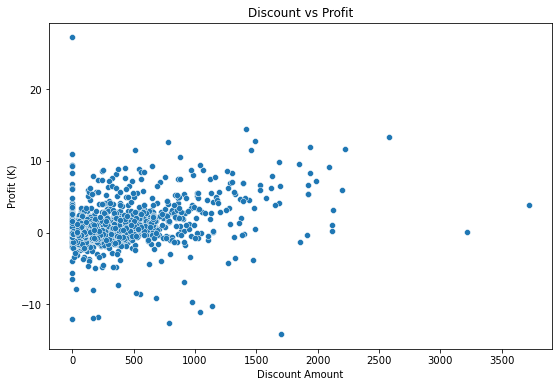

In [3]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = df["Discount Amount"], y = df["Profit"] / 1000)
plt.title("Discount vs Profit")
plt.ylabel("Profit (K)")
plt.show()

## Question 2: Scatter Plot of Profit and Discount Amount by Profitability

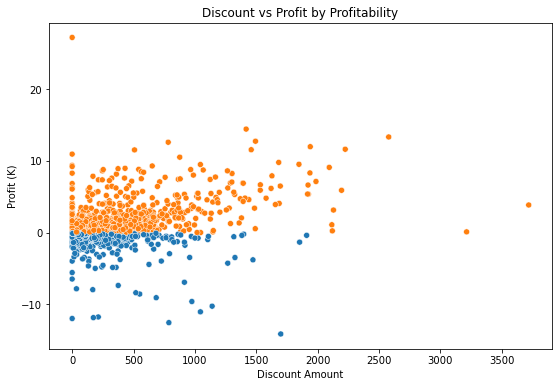

In [4]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = df["Discount Amount"], y = df["Profit"] / 1000, hue = df["Profit"] > 0, legend = False)
plt.title("Discount vs Profit by Profitability")
plt.ylabel("Profit (K)")
plt.show()

## Question 3: Dispaly Sales by the Order Date (Month/Year)

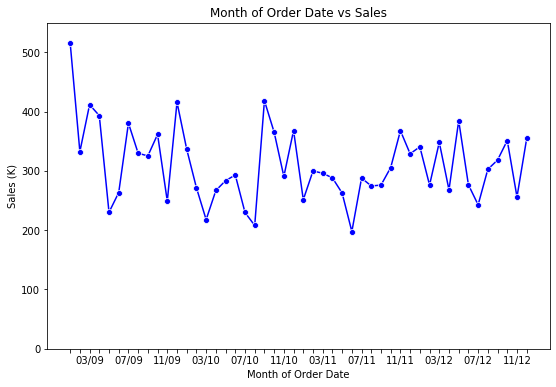

In [5]:
df["Order Month"] = pd.to_datetime(df["Order Date"]).dt.to_period('M')
sales_in_month = df.sort_values("Order Month").groupby("Order Month")["Sales"].sum()
sales_in_month.index = sales_in_month.index.strftime('%m/%y')
plt.figure(figsize = (9, 6))
line_plot = sns.lineplot(x = sales_in_month.index, y = sales_in_month / 1000, marker = "o", color = "blue")
plt.title("Month of Order Date vs Sales")
plt.xlabel("Month of Order Date")
plt.ylabel("Sales (K)")
plt.ylim([0, 550])
for index, label in enumerate(line_plot.get_xticklabels()):
    if index in range(2, len(sales_in_month), 4):
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

## Question 4: Dispaly Sales by the Order Date (Month/Year) by profitability

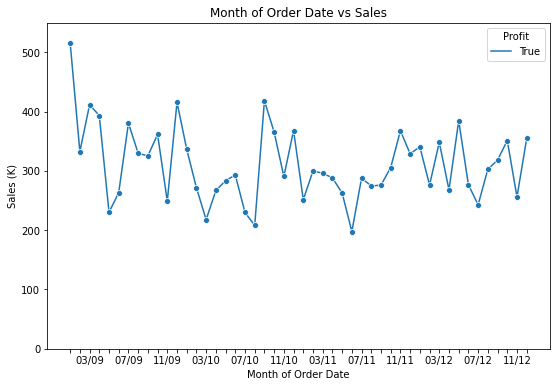

In [6]:
profit_in_month = df.sort_values("Order Month").groupby("Order Month")["Profit"].sum()
profit_in_month.index = profit_in_month.index.strftime('%m/%y')
plt.figure(figsize = (9, 6))
line_plot = sns.lineplot(x = sales_in_month.index, y = sales_in_month / 1000, hue = profit_in_month > 0, 
                         marker = "o", color = "blue")
plt.title("Month of Order Date vs Sales")
plt.xlabel("Month of Order Date")
plt.ylabel("Sales (K)")
plt.ylim([0, 550])
for index, label in enumerate(line_plot.get_xticklabels()):
    if index in range(2, len(sales_in_month), 4):
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

## Question 5: Bar Garph

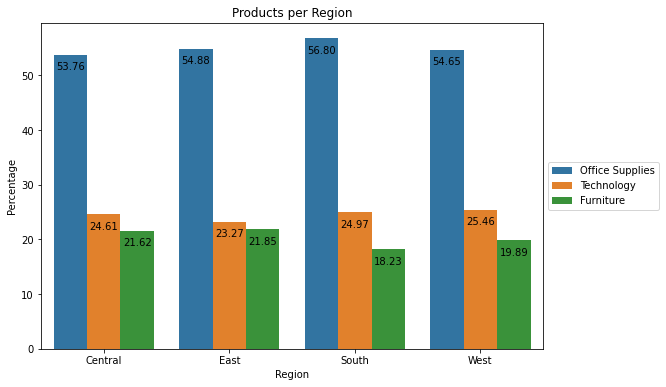

In [7]:
product_per_region = df.groupby("Region")["Product Category"].value_counts(normalize = True) * 100
product_per_region.name = "Percentage"
product_per_region = product_per_region.reset_index()

plt.subplots(figsize=(9, 6))
bar_plot = sns.barplot(x = "Region", y = "Percentage", hue = "Product Category", data = product_per_region)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title("Products per Region")
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', size = 10, xytext = (0, -12), textcoords = 'offset points')
plt.show()

## Question 6: 

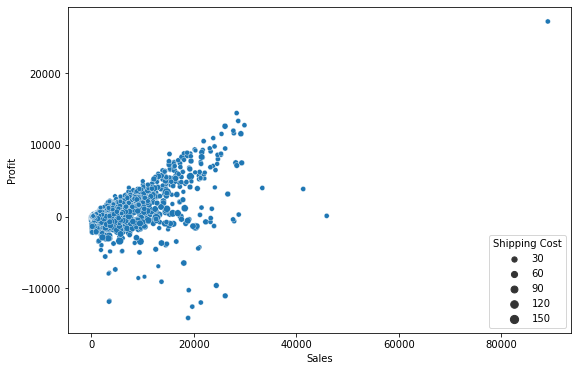

In [8]:
plt.subplots(figsize=(9, 6))
sns.scatterplot(x = "Sales", y = "Profit", size = "Shipping Cost", data = df)
plt.legend(loc = "lower right", title = "Shipping Cost")
plt.show()

## Question 7:

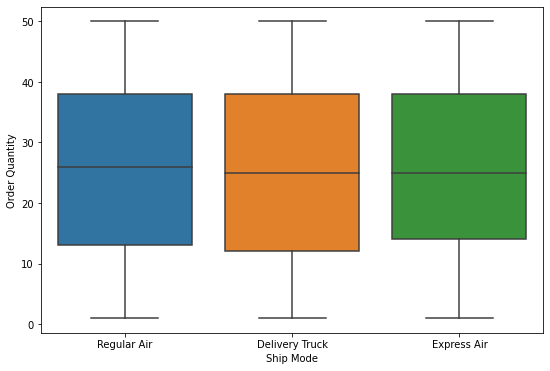

In [9]:
plt.subplots(figsize=(9, 6))
sns.boxplot(x = "Ship Mode", y = "Order Quantity", data = df)
plt.show()

## Question 8:

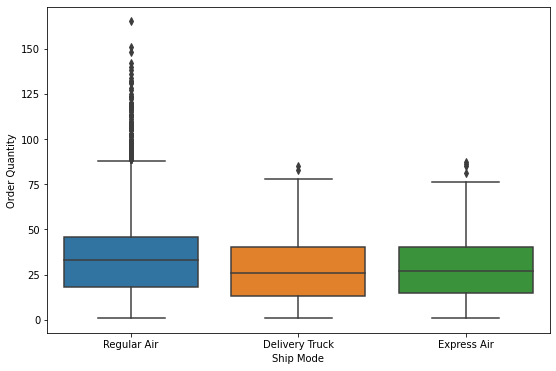

In [10]:
Q8 = df.groupby(["Order ID", "Ship Mode"])["Order Quantity"].sum()
Q8 = Q8.reset_index()
plt.subplots(figsize=(9, 6))
sns.boxplot(x = "Ship Mode", y = "Order Quantity", data = Q8)
plt.show()